<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> Sales Prediction
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Submitted by
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Shameer.Sutar


## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20"> Importing Libraries</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")
sns.set(style="whitegrid")

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20"> loading data and some stastistical features</div>

In [9]:
# Load the data
file_path = "C:/Users/ADMIN/Advertising.csv" 
data = pd.read_csv(file_path)

In [10]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
# Get information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
# Summary statistics
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [11]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [12]:
data.duplicated().sum()

0

In [13]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.shape

(200, 4)

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20"> EDA </div>

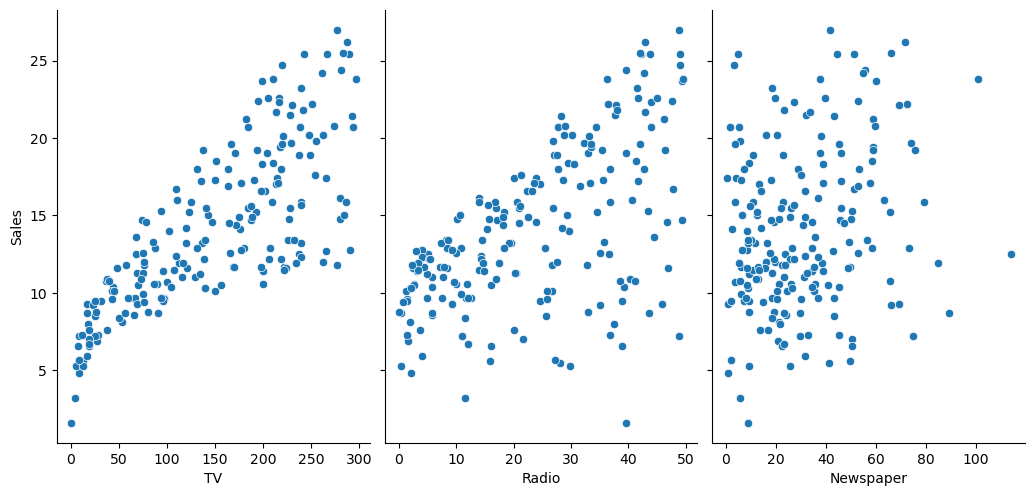

In [14]:
# Visualize the relationship between features and target (sales)
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=5, aspect=0.7)
plt.show()


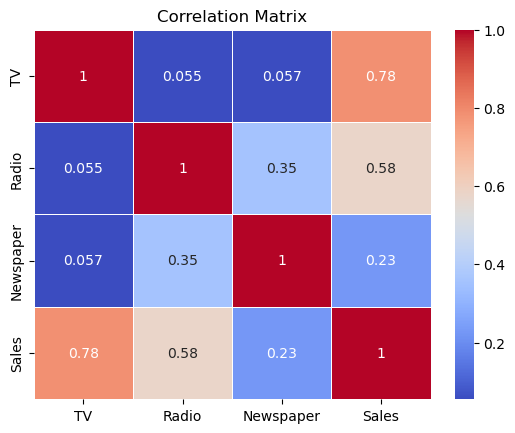

In [15]:
# Correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()


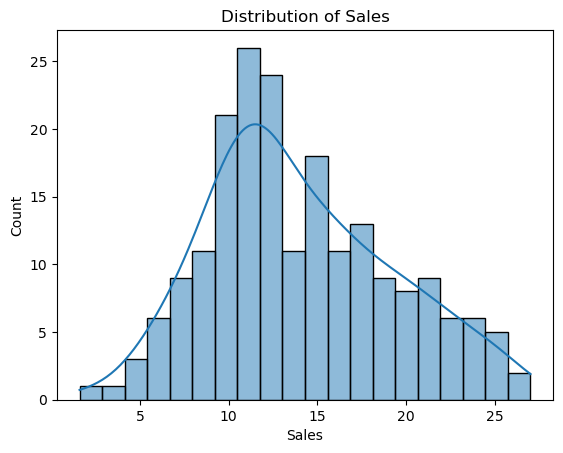

In [16]:
# Visualize the distribution of the target variable (Sales)
sns.histplot(data['Sales'], bins=20, kde=True)
plt.title("Distribution of Sales")
plt.show()

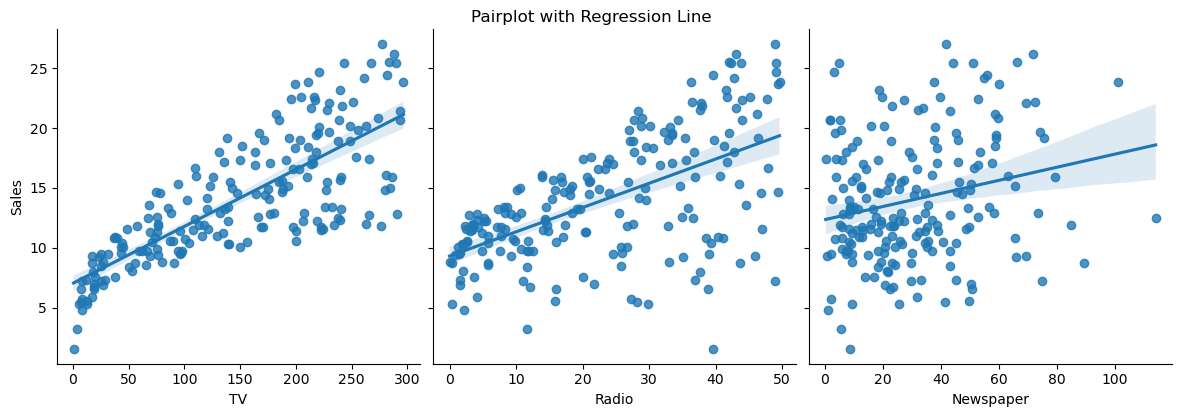

In [17]:
# Pairplot with regression line
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='reg')
plt.suptitle("Pairplot with Regression Line", y=1.02)
plt.show()


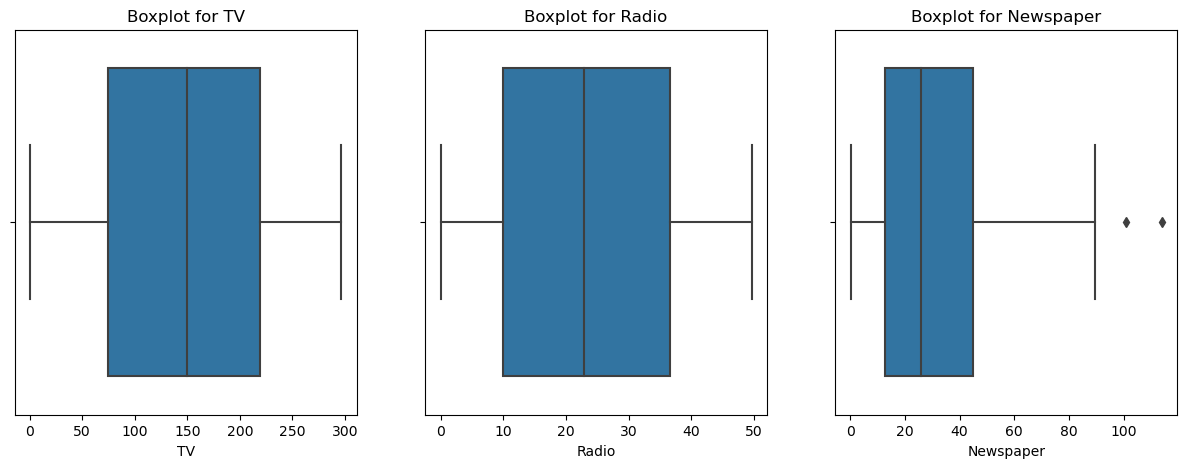

In [19]:
# Boxplot for outlier detection
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, column in enumerate(['TV', 'Radio', 'Newspaper']):
    sns.boxplot(x=data[column], ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')

plt.show()


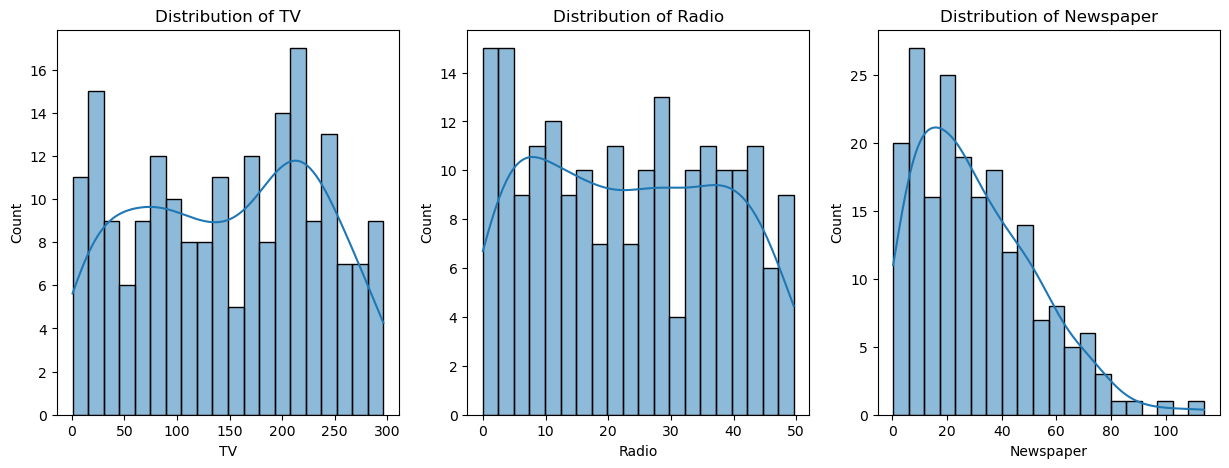

In [20]:
# Distribution of features
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, column in enumerate(['TV', 'Radio', 'Newspaper']):
    sns.histplot(data[column], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

plt.show()


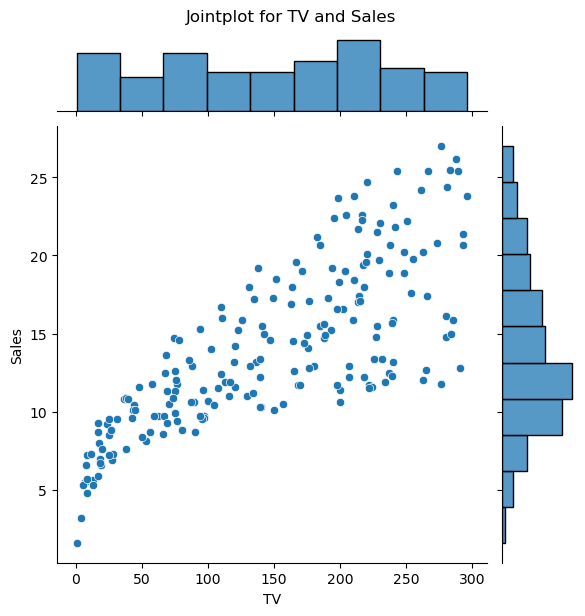

In [22]:
# Jointplot for TV and Sales
sns.jointplot(x='TV', y='Sales', data=data, kind='scatter')
plt.suptitle("Jointplot for TV and Sales", y=1.02)
plt.show()


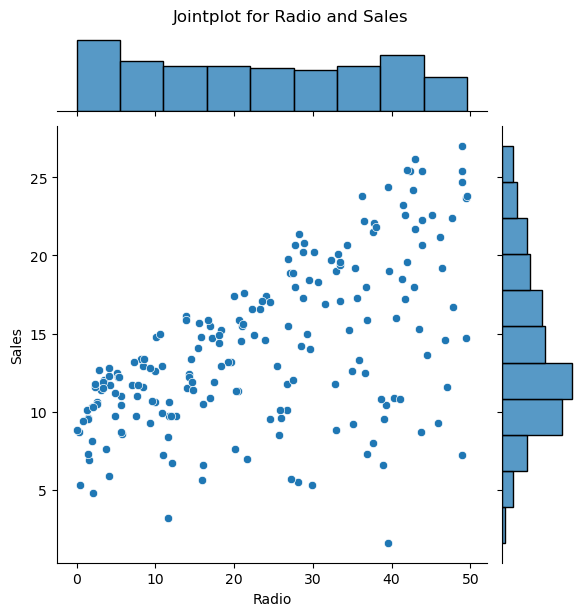

In [23]:

# Jointplot for Radio and Sales
sns.jointplot(x='Radio', y='Sales', data=data, kind='scatter')
plt.suptitle("Jointplot for Radio and Sales", y=1.02)
plt.show()


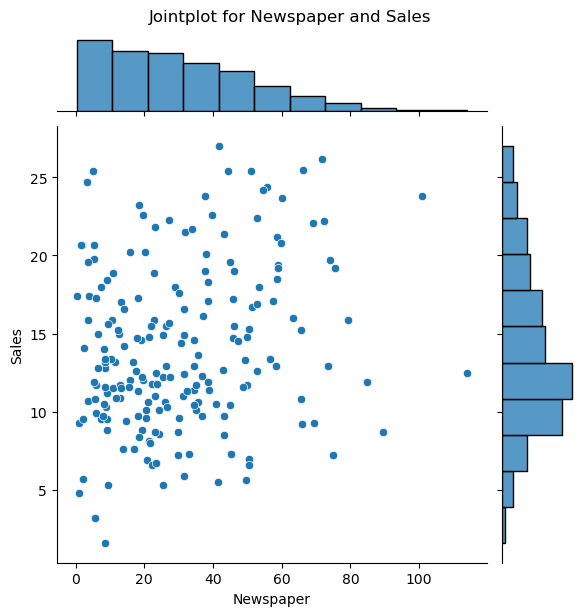

In [24]:

# Jointplot for Newspaper and Sales
sns.jointplot(x='Newspaper', y='Sales', data=data, kind='scatter')
plt.suptitle("Jointplot for Newspaper and Sales", y=1.02)
plt.show()

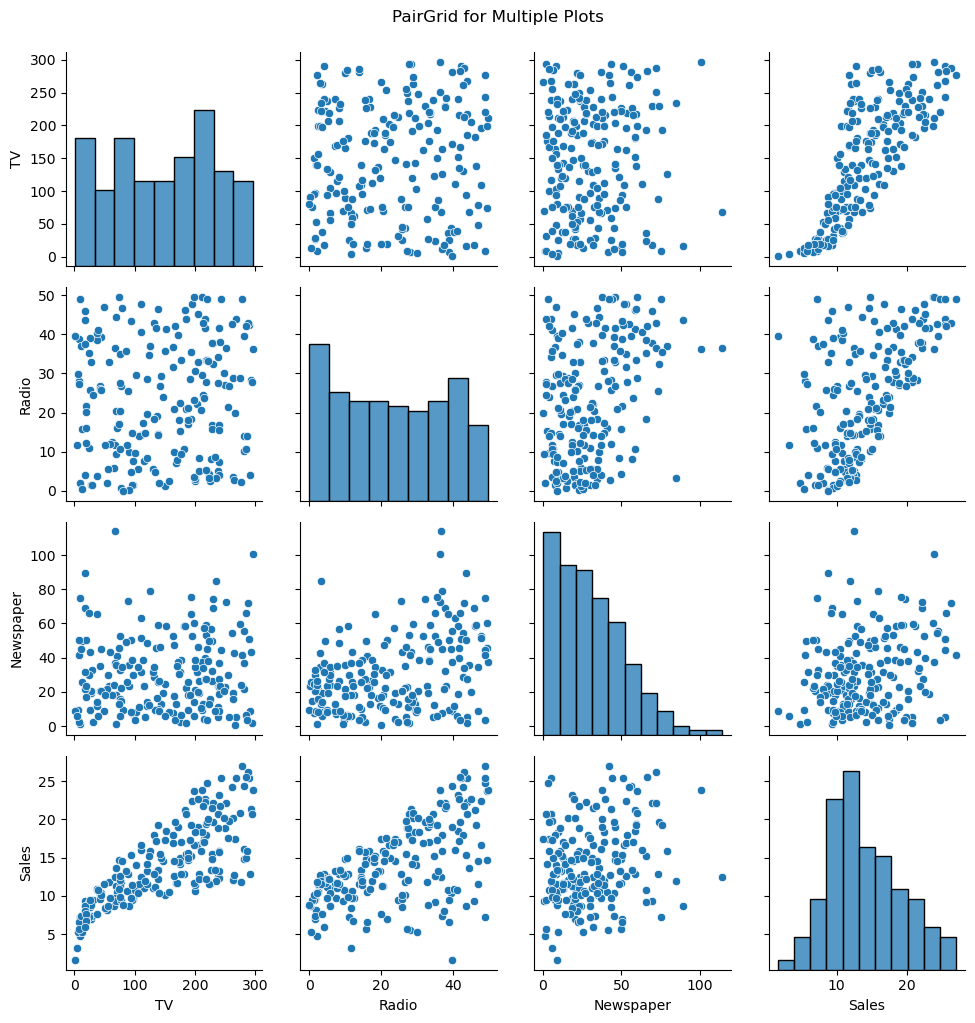

In [26]:
# PairGrid for multiple plots
g = sns.PairGrid(data)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
plt.suptitle("PairGrid for Multiple Plots", y=1.02)
plt.show()


## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20"> Model building </div>l

In [ ]:
# Import necessary library
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Select features and target
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">linear regression model</div>

In [ ]:
# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)


In [30]:
# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

# Display cross-validation scores
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean RMSE:", np.mean(cv_rmse_scores))


Cross-Validation RMSE Scores: [1.77102792 1.55745554 1.25905722 2.32941088 1.67067208]
Mean RMSE: 1.7175247278732086


In [36]:
# Create a DataFrame for actual and predicted values
comparison_df = pd.DataFrame({'Actual Sales': y_test, 'Predicted Sales': y_pred})
comparison_df.reset_index(drop=True, inplace=True)

# Display the comparison
comparison_df.head(10)


,Actual Sales,Predicted Sales
0,16.9,16.408024
1,22.4,20.889882
2,21.4,21.553843
3,7.3,10.608503
4,24.7,22.112373
5,12.6,13.105592
6,22.3,21.057192
7,8.4,7.461010
8,11.5,13.606346
9,14.9,15.155070


## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">decision tree regression model </div>

In [32]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the decision tree regression model
tree_model = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree_model.fit(X_train, y_train)

# Make predictions on the test data
tree_y_pred = tree_model.predict(X_test)

# Evaluate the decision tree model
tree_mae = metrics.mean_absolute_error(y_test, tree_y_pred)
tree_mse = metrics.mean_squared_error(y_test, tree_y_pred)
tree_rmse = np.sqrt(tree_mse)

print('Decision Tree - Mean Absolute Error:', tree_mae)
print('Decision Tree - Mean Squared Error:', tree_mse)
print('Decision Tree - Root Mean Squared Error:', tree_rmse)


Decision Tree - Mean Absolute Error: 0.9850000000000001
Decision Tree - Mean Squared Error: 2.175
Decision Tree - Root Mean Squared Error: 1.4747881203752624


In [35]:
# Create a DataFrame for actual and predicted values using the decision tree model
tree_comparison_df = pd.DataFrame({'Actual Sales': y_test, 'Predicted Sales (Decision Tree)': tree_y_pred})
tree_comparison_df.reset_index(drop=True, inplace=True)

# Display the comparison
tree_comparison_df.head(10)


,Actual Sales,Predicted Sales (Decision Tree)
0,16.9,18.5
1,22.4,20.7
2,21.4,20.2
3,7.3,6.6
4,24.7,23.8
5,12.6,13.3
6,22.3,22.6
7,8.4,9.7
8,11.5,11.7
9,14.9,14.1


## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">random forest regression model </div>

In [37]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the random forest regression model
forest_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
forest_model.fit(X_train, y_train)

# Make predictions on the test data
forest_y_pred = forest_model.predict(X_test)

# Evaluate the random forest model
forest_mae = metrics.mean_absolute_error(y_test, forest_y_pred)
forest_mse = metrics.mean_squared_error(y_test, forest_y_pred)
forest_rmse = np.sqrt(forest_mse)

print('Random Forest - Mean Absolute Error:', forest_mae)
print('Random Forest - Mean Squared Error:', forest_mse)
print('Random Forest - Root Mean Squared Error:', forest_rmse)


Random Forest - Mean Absolute Error: 0.6200999999999988
Random Forest - Mean Squared Error: 0.5907322499999988
Random Forest - Root Mean Squared Error: 0.7685910811348248


In [38]:
# Create a DataFrame for actual and predicted values using the random forest model
forest_comparison_df = pd.DataFrame({'Actual Sales': y_test, 'Predicted Sales (Random Forest)': forest_y_pred})
forest_comparison_df.reset_index(drop=True, inplace=True)

# Display the comparison
forest_comparison_df.head(10)


,Actual Sales,Predicted Sales (Random Forest)
0,16.9,17.698
1,22.4,21.804
2,21.4,20.628
3,7.3,6.793
4,24.7,22.927
5,12.6,13.379
6,22.3,22.376
7,8.4,9.688
8,11.5,11.826
9,14.9,15.540
